In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kriti-stock-market-prediction/1_train.csv
/kaggle/input/kriti-stock-market-prediction/4_train.csv
/kaggle/input/kriti-stock-market-prediction/3_train.csv
/kaggle/input/kriti-stock-market-prediction/test.csv
/kaggle/input/kriti-stock-market-prediction/2_train.csv


<div style="border: 2px solid blue; border-radius: 5px; color:red;">
    <h1><b><u>BRIEF OVERVIEW</u></b></h1>
    <p>Stock Price Prediction using machine learning helps you discover the future value of company stock and other financial assets traded on an exchange. The entire idea of predicting stock prices is to gain significant profits. Predicting how the stock market will perform is a hard task to do. There are other factors involved in the prediction, such as physical and psychological factors, rational and irrational behavior, and so on. All these factors combine to make share prices dynamic and volatile. This makes it very difficult to predict stock prices with high accuracy</p>
</div>

In [2]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


> **Reading csv files and creating dataframes**


In [3]:
train_1 = pd.read_csv("/kaggle/input/kriti-stock-market-prediction/1_train.csv")
df1 = pd.DataFrame(train_1)

train_2 = pd.read_csv("/kaggle/input/kriti-stock-market-prediction/2_train.csv")
df2 = pd.DataFrame(train_2)

train_3 = pd.read_csv("/kaggle/input/kriti-stock-market-prediction/3_train.csv")
df3 = pd.DataFrame(train_3)

train_4 = pd.read_csv("/kaggle/input/kriti-stock-market-prediction/4_train.csv")
df4 = pd.DataFrame(train_4)

test_csv = pd.read_csv("/kaggle/input/kriti-stock-market-prediction/test.csv")
test_df = pd.DataFrame(test_csv)

In [4]:
train_1 = pd.read_csv("/kaggle/input/kriti-stock-market-prediction/1_train.csv")
df1t = pd.DataFrame(train_1)

train_2 = pd.read_csv("/kaggle/input/kriti-stock-market-prediction/2_train.csv")
df2t = pd.DataFrame(train_2)

train_3 = pd.read_csv("/kaggle/input/kriti-stock-market-prediction/3_train.csv")
df3t = pd.DataFrame(train_3)

train_4 = pd.read_csv("/kaggle/input/kriti-stock-market-prediction/4_train.csv")
df4t = pd.DataFrame(train_4)


In [5]:
test_df.head()

,Date,Open,High,Low,Adj Close,Volume,Company,ID
0,17-07-2020,101.04,102.52,99.28,99.93,139950000.0,4.0,0
1,20-07-2020,101.28,110.03,99.24,109.62,256821000.0,4.0,1
2,21-07-2020,109.12,111.60,103.88,104.46,241608000.0,4.0,2
3,22-07-2020,106.65,108.45,104.05,105.86,212416500.0,4.0,3
4,23-07-2020,112.07,112.49,98.92,101.04,364927500.0,4.0,4


In [6]:
Close_1 = df1.Close
Close_2 = df2.Close
Close_3 = df3.Close
Close_4 = df4.Close

In [7]:
df1t.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,9.50,9.47,9.23,9.04,7.93,1.133345e+09
1,2010-06-30,9.25,9.22,9.00,8.70,7.52,7.394520e+08
2,2010-07-01,9.01,9.02,8.63,8.94,7.45,1.022896e+09
3,2010-07-02,8.98,8.96,8.74,8.85,7.68,6.938428e+08
4,2010-07-06,9.13,9.13,8.61,9.36,7.68,6.152356e+08


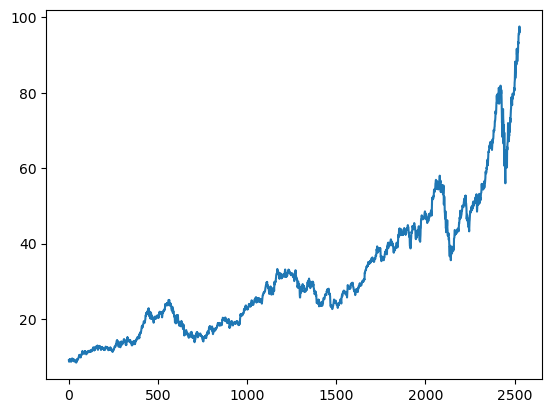

In [8]:
plt.plot(df1.Close)

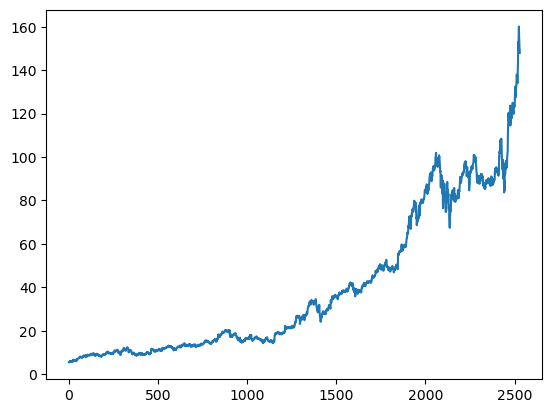

In [9]:
plt.plot(df2.Close)

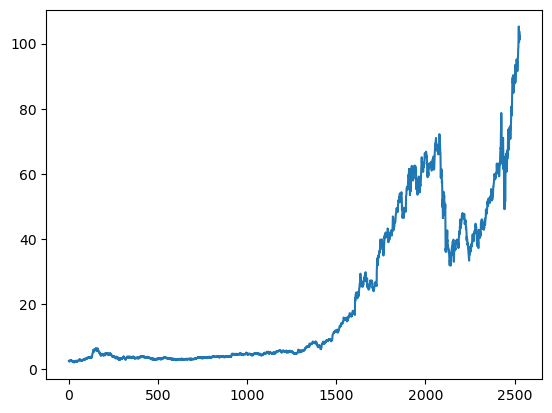

In [10]:
plt.plot(df3.Close)

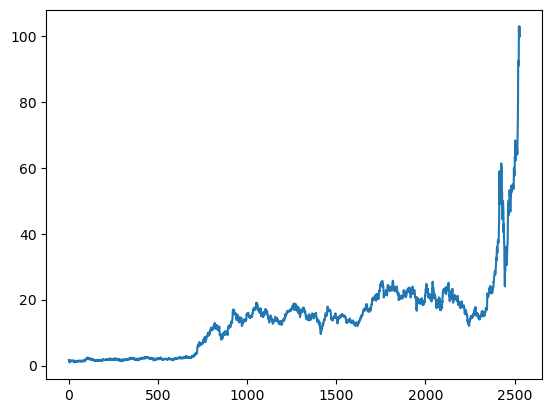

In [11]:
plt.plot(df4.Close)

<div style="border: 2px solid blue; border-radius: 5px; color:red;">
    <h1><b>EDA : EXPLORATORY DATA ANALYSIS</b></h1>
</div>

>**DAILY RETURN:**
THESE ARE THE PERCENTAGE CHANGE OF THE STOCK FROM THE PREVIOUS DAY STOCK VALUE

In [12]:
df1["Daily Returns"] = Close_1.pct_change(1)
df2["Daily Returns"] = Close_2.pct_change(1)
df3["Daily Returns"] = Close_3.pct_change(1)
df4["Daily Returns"] = Close_4.pct_change(1)

> <div style="border: 2px solid blue; border-radius: 5px; color:red;">
    <h3><b>PLOTS OF DAILY RETURNS OF THE INDIVIDUAL TRAINING DATA </b></h3>
</div>

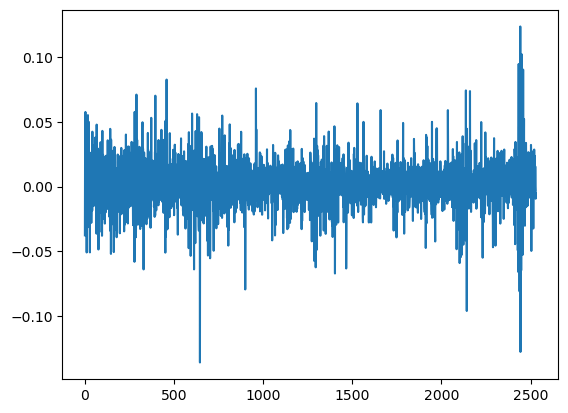

In [13]:
plt.plot(df1["Daily Returns"])

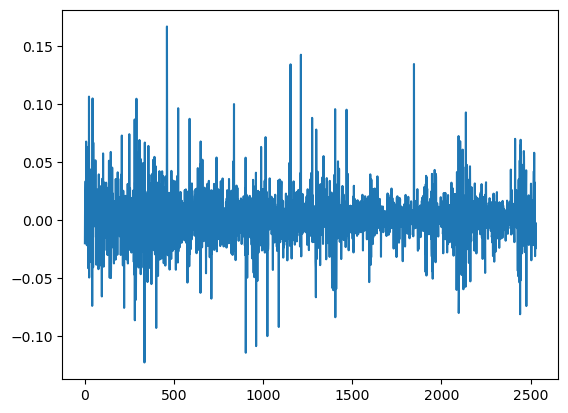

In [14]:
plt.plot(df2["Daily Returns"])

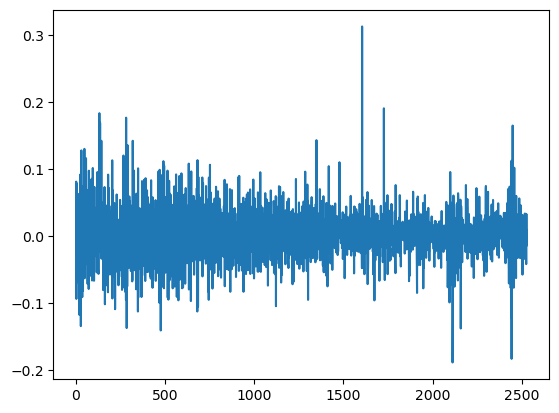

In [15]:
plt.plot(df3["Daily Returns"])

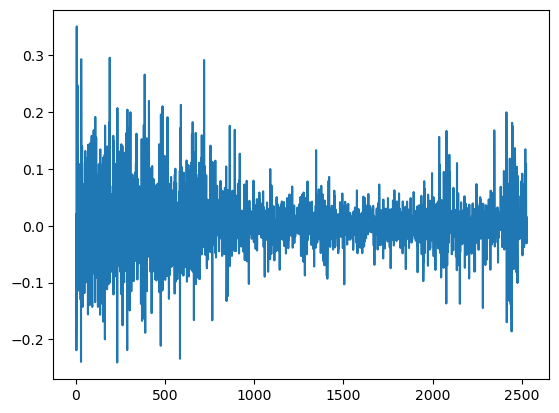

In [16]:
plt.plot(df4["Daily Returns"])

In [17]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,2010-06-29,9.50,9.47,9.23,9.04,7.93,1.133345e+09,NaN
1,2010-06-30,9.25,9.22,9.00,8.70,7.52,7.394520e+08,-0.037611
2,2010-07-01,9.01,9.02,8.63,8.94,7.45,1.022896e+09,0.027586
3,2010-07-02,8.98,8.96,8.74,8.85,7.68,6.938428e+08,-0.010067
4,2010-07-06,9.13,9.13,8.61,9.36,7.68,6.152356e+08,0.057627


> **BOLLINGER BANDS:**
gives traders an idea of where the market is moving based on prices. It involves the use of three bands—one for the upper level, another for the lower level, and the third for the moving average

In [18]:


def bollinger_bands(df, n, m):
    # takes dataframe on input
    # n = smoothing length
    # m = number of standard deviations away from MA
    
    #typical price
    TP = (df['High'] + df['Low'] + df['Close']) / 3
    # but we will use Adj close instead for now, depends
    
    data = TP
    #data = df['Adj Close']
    
    # takes one column from dataframe
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df



In [19]:
n = 30   # datapoint rolling window
m = 2   # sigma width
df1 = bollinger_bands(df1, n, m)

In [20]:
n = 30   # datapoint rolling window
m = 2   # sigma width
df2 = bollinger_bands(df2, n, m)

In [21]:
n = 30   # datapoint rolling window
m = 2   # sigma width
df3 = bollinger_bands(df3, n, m)

In [22]:
n = 30   # datapoint rolling window
m = 2   # sigma width
df4 = bollinger_bands(df4, n, m)

In [23]:
df4.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns,B_MA,BU,BL
2525,10-07-2020,93.01,103.33,91.81,99.79,102.99,350064000.0,-0.030977,69.939222,93.913536,45.964908
2526,13-07-2020,110.60,119.64,98.11,101.35,99.77,584781000.0,0.015633,71.604667,98.456992,44.752342
2527,14-07-2020,103.70,106.08,95.47,102.98,101.24,351271500.0,0.016083,73.042556,101.532913,44.552198
2528,15-07-2020,102.64,103.27,97.09,99.88,102.98,245517000.0,-0.030103,74.406778,104.041585,44.771970
2529,16-07-2020,98.40,102.10,97.60,100.15,99.99,214512000.0,0.002703,75.779889,106.220505,45.339273


In [24]:
# df1[10:40]

> <div style="border: 2px solid blue; border-radius: 5px; color:red;">
    <h3><b>PLOTS OF BOLLINGER BANDS OF THE INDIVIDAUL TRAINING DATA </b></h3>
</div>

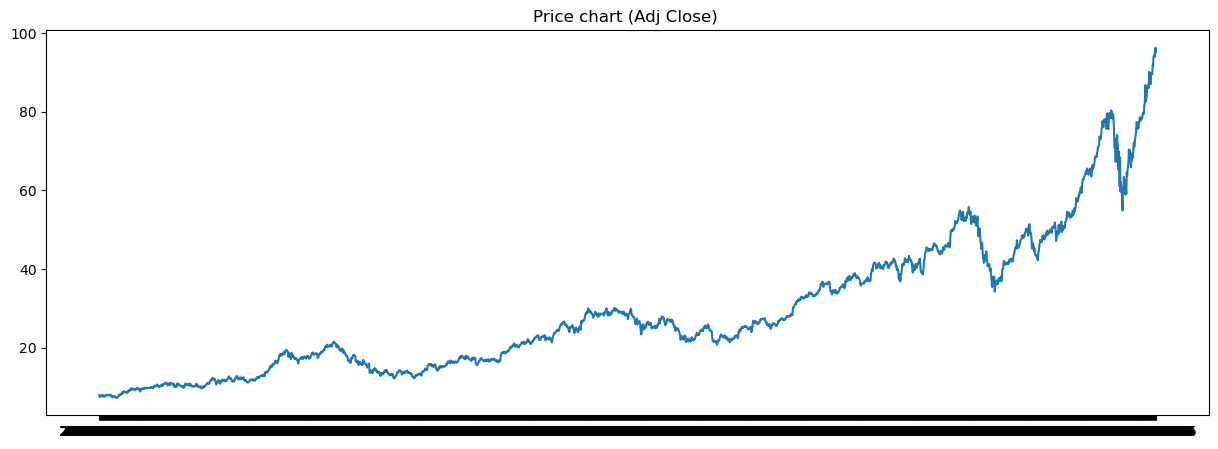

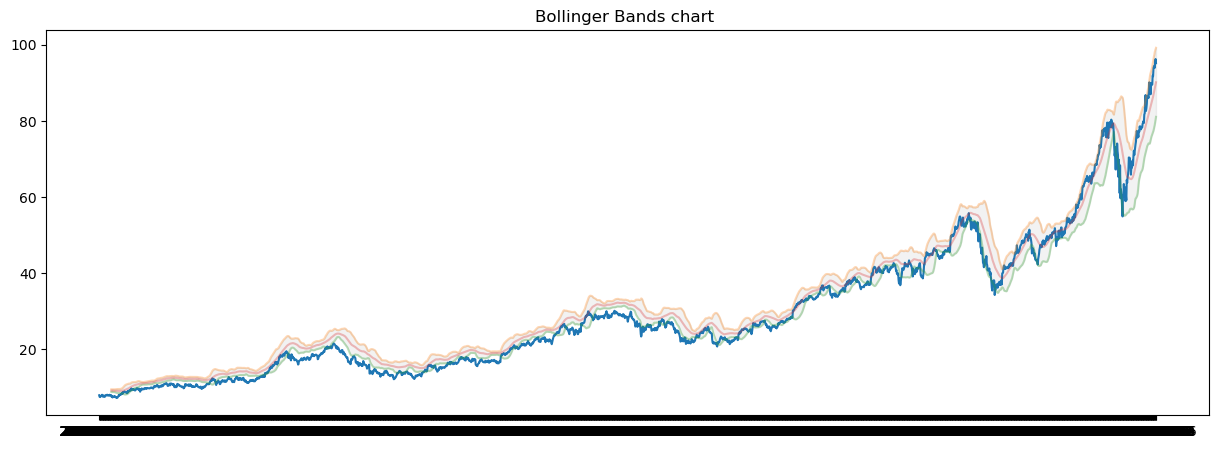

In [25]:
plt.figure(figsize=(15,5))
plt.plot(df1['Date'], df1['Adj Close'])
plt.title('Price chart (Adj Close) ')
plt.show()

# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart ')
plt.plot(df1['Date'], df1['Adj Close'])
plt.plot(df1['Date'], df1['BU'], alpha=0.3)
plt.plot(df1['Date'], df1['BL'], alpha=0.3)
plt.plot(df1['Date'], df1['B_MA'], alpha=0.3)
plt.fill_between(df1['Date'], df1['BU'], df1['BL'], color='grey', alpha=0.1)

plt.show()

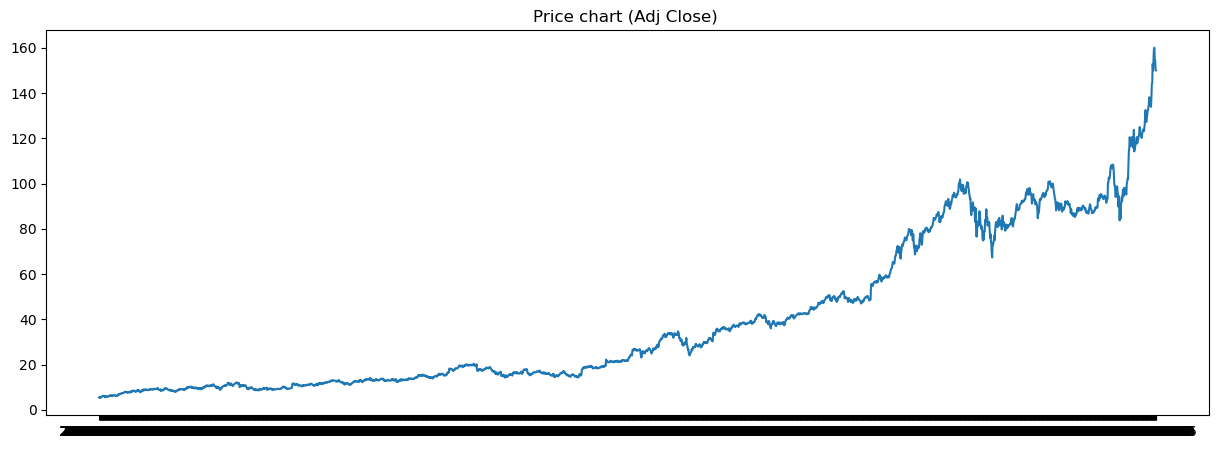

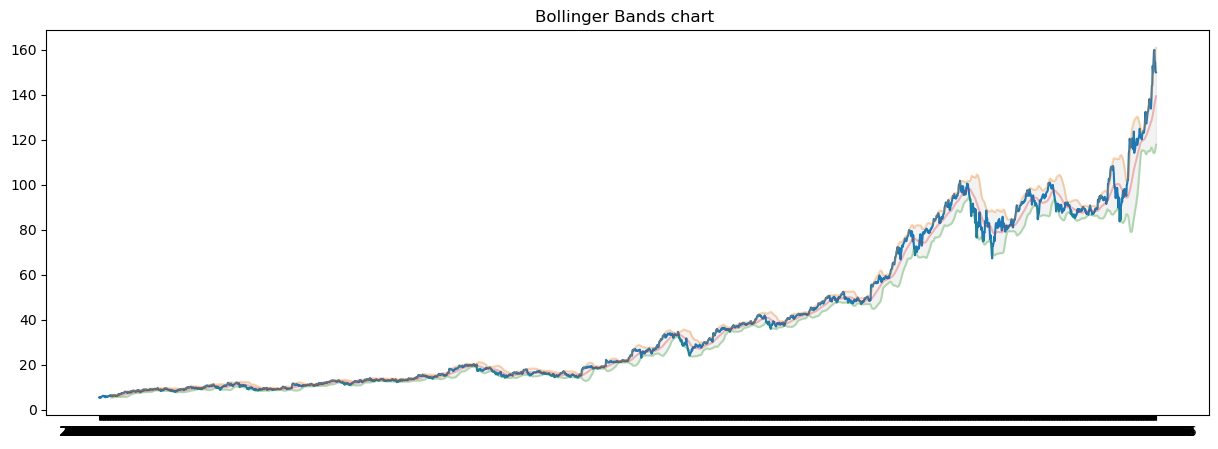

In [26]:
plt.figure(figsize=(15,5))
plt.plot(df2['Date'], df2['Adj Close'])
plt.title('Price chart (Adj Close) ')
plt.show()

# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart ')
plt.plot(df2['Date'], df2['Adj Close'])
plt.plot(df2['Date'], df2['BU'], alpha=0.3)
plt.plot(df2['Date'], df2['BL'], alpha=0.3)
plt.plot(df2['Date'], df2['B_MA'], alpha=0.3)
plt.fill_between(df2['Date'], df2['BU'], df2['BL'], color='grey', alpha=0.1)

plt.show()

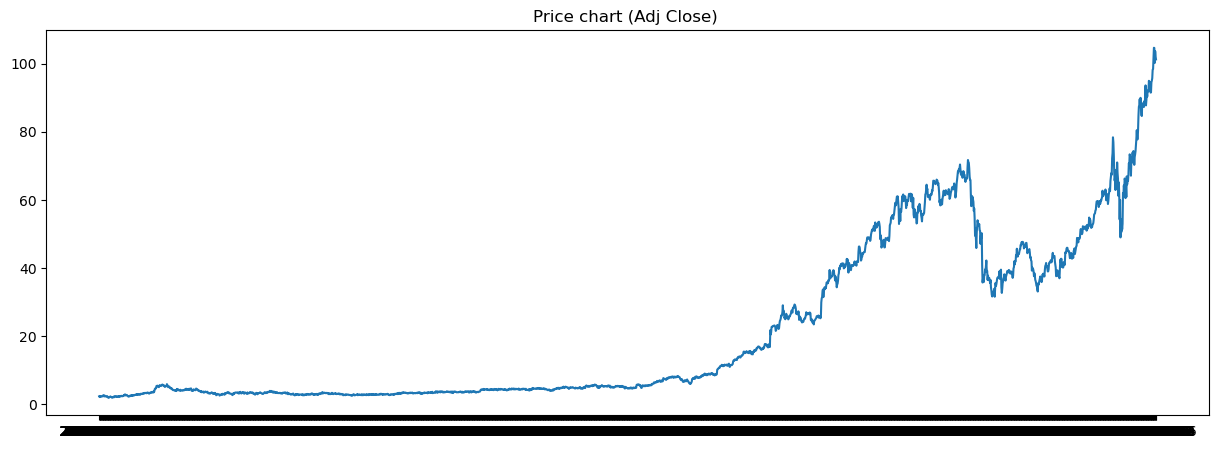

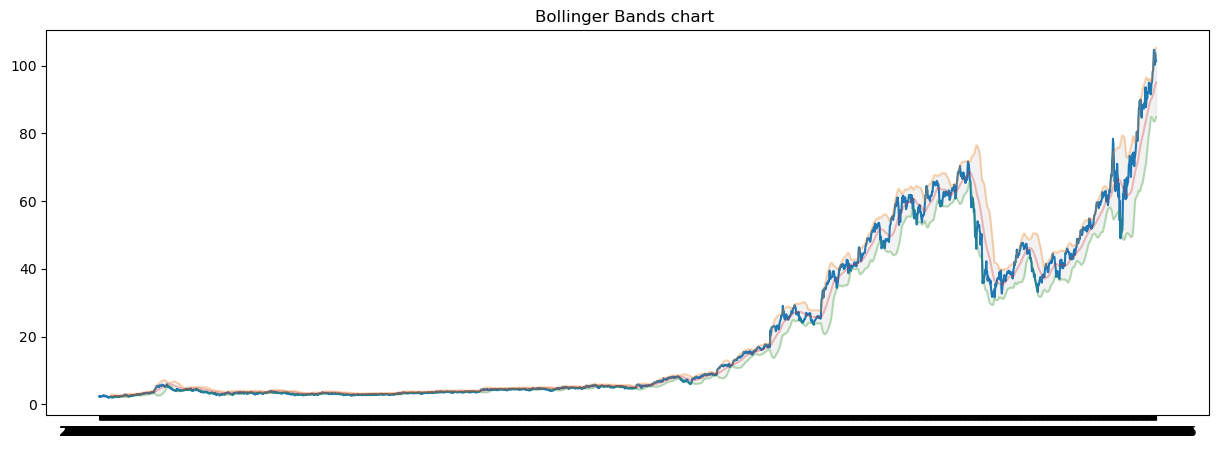

In [27]:
plt.figure(figsize=(15,5))
plt.plot(df3['Date'], df3['Adj Close'])
plt.title('Price chart (Adj Close) ')
plt.show()

# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart ')
plt.plot(df3['Date'], df3['Adj Close'])
plt.plot(df3['Date'], df3['BU'], alpha=0.3)
plt.plot(df3['Date'], df3['BL'], alpha=0.3)
plt.plot(df3['Date'], df3['B_MA'], alpha=0.3)
plt.fill_between(df3['Date'], df3['BU'], df3['BL'], color='grey', alpha=0.1)

plt.show()

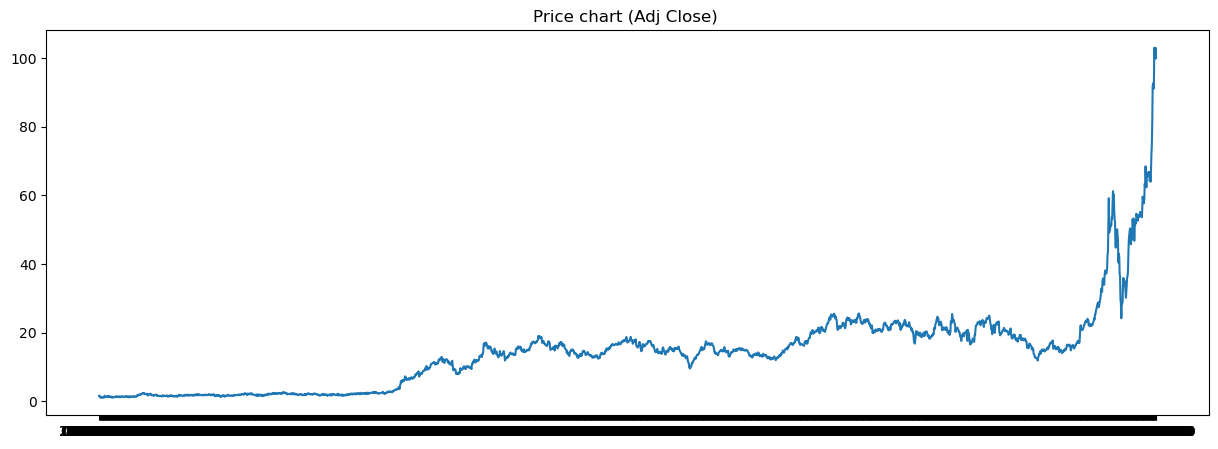

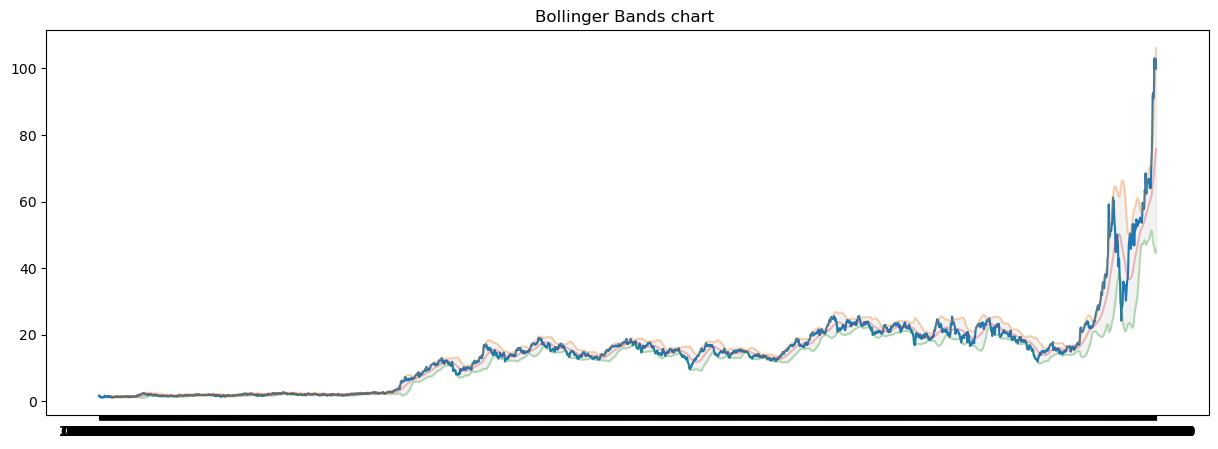

In [28]:
plt.figure(figsize=(15,5))
plt.plot(df4['Date'], df4['Adj Close'])
plt.title('Price chart (Adj Close) ')
plt.show()

# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart ')
plt.plot(df4['Date'], df4['Adj Close'])
plt.plot(df4['Date'], df4['BU'], alpha=0.3)
plt.plot(df4['Date'], df4['BL'], alpha=0.3)
plt.plot(df4['Date'], df4['B_MA'], alpha=0.3)
plt.fill_between(df4['Date'], df4['BU'], df4['BL'], color='grey', alpha=0.1)

plt.show()

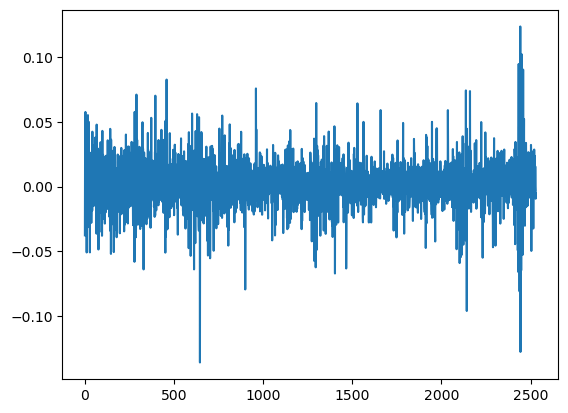

In [29]:
plt.plot(df1["Daily Returns"])

In [30]:
df1.corr()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,B_MA,BU,BL
Open,1.000000,0.999761,0.999754,0.998870,0.999151,-0.545677,0.002667,0.992787,0.989523,0.990396
High,0.999761,1.000000,0.999636,0.999035,0.999376,-0.542127,0.002703,0.993546,0.990597,0.990771
Low,0.999754,0.999636,1.000000,0.999044,0.999331,-0.550354,0.002338,0.992016,0.988492,0.989942
Close,0.998870,0.999035,0.999044,1.000000,0.998798,-0.545881,0.034437,0.991775,0.988629,0.989249
Adj Close,0.999151,0.999376,0.999331,0.998798,1.000000,-0.546567,0.002126,0.992590,0.989762,0.989676
Volume,-0.545677,-0.542127,-0.550354,-0.545881,-0.546567,1.000000,0.005077,-0.536242,-0.518478,-0.554200
Daily Returns,0.002667,0.002703,0.002338,0.034437,0.002126,0.005077,1.000000,0.001484,0.002866,-0.000188
B_MA,0.992787,0.993546,0.992016,0.991775,0.992590,-0.536242,0.001484,1.000000,0.997600,0.996524
BU,0.989523,0.990597,0.988492,0.988629,0.989762,-0.518478,0.002866,0.997600,1.000000,0.988364
BL,0.990396,0.990771,0.989942,0.989249,0.989676,-0.554200,-0.000188,0.996524,0.988364,1.000000


In [31]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns,B_MA,BU,BL
0,2010-06-29,9.50,9.47,9.23,9.04,7.93,1.133345e+09,NaN,NaN,NaN,NaN
1,2010-06-30,9.25,9.22,9.00,8.70,7.52,7.394520e+08,-0.037611,NaN,NaN,NaN
2,2010-07-01,9.01,9.02,8.63,8.94,7.45,1.022896e+09,0.027586,NaN,NaN,NaN
3,2010-07-02,8.98,8.96,8.74,8.85,7.68,6.938428e+08,-0.010067,NaN,NaN,NaN
4,2010-07-06,9.13,9.13,8.61,9.36,7.68,6.152356e+08,0.057627,NaN,NaN,NaN


In [32]:
# X1 = df1["Daily Returns"]
# X2 = df2["Daily Returns"]
# X3 = df3["Daily Returns"]
# X4 = df4["Daily Returns"]

In [33]:
# X1 = np.array(X1).reshape(-1,1)
# X2 = np.array(X2).reshape(-1,1)
# X3 = np.array(X3).reshape(-1,1)
# X4 = np.array(X4).reshape(-1,1)

In [34]:
# df_1 = df1.dropna()
# df_2 = df2.dropna()
# df_3= df3.dropna()
# df_4 = df4.dropna()

In [35]:
df_1 = df1
df_2 = df2
df_3 = df3
df_4 = df4

In [36]:
df_1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns,B_MA,BU,BL
0,2010-06-29,9.50,9.47,9.23,9.04,7.93,1.133345e+09,NaN,NaN,NaN,NaN
1,2010-06-30,9.25,9.22,9.00,8.70,7.52,7.394520e+08,-0.037611,NaN,NaN,NaN
2,2010-07-01,9.01,9.02,8.63,8.94,7.45,1.022896e+09,0.027586,NaN,NaN,NaN
3,2010-07-02,8.98,8.96,8.74,8.85,7.68,6.938428e+08,-0.010067,NaN,NaN,NaN
4,2010-07-06,9.13,9.13,8.61,9.36,7.68,6.152356e+08,0.057627,NaN,NaN,NaN


In [37]:
df_1 = df_1.drop(["Date","Volume","Daily Returns"],axis=1)
df_2 = df_2.drop(["Date","Volume","Daily Returns"],axis=1)
df_3 = df_3.drop(["Date","Volume","Daily Returns"],axis=1)
df_4 = df_4.drop(["Date","Volume","Daily Returns"],axis=1)

In [38]:
df_1.shape

(2530, 8)

In [39]:
df_1.head()

,Open,High,Low,Close,Adj Close,B_MA,BU,BL
0,9.50,9.47,9.23,9.04,7.93,NaN,NaN,NaN
1,9.25,9.22,9.00,8.70,7.52,NaN,NaN,NaN
2,9.01,9.02,8.63,8.94,7.45,NaN,NaN,NaN
3,8.98,8.96,8.74,8.85,7.68,NaN,NaN,NaN
4,9.13,9.13,8.61,9.36,7.68,NaN,NaN,NaN


In [40]:
df_1 = df_1.dropna()
df_2 = df_2.dropna()
df_3= df_3.dropna()
df_4 = df_4.dropna()

In [41]:
Y1 = df_1.Close
Y2 = df_2.Close
Y3 = df_3.Close
Y4 = df_4.Close


In [42]:
df_1.shape,Y1.shape

((2501, 8), (2501,))

In [43]:
df_2.head()

,Open,High,Low,Close,Adj Close,B_MA,BU,BL
29,6.15,6.50,6.33,6.21,6.51,5.938889,6.498189,5.379589
30,6.34,6.50,6.24,6.21,6.30,5.964778,6.519558,5.409997
31,6.16,6.25,6.27,6.24,6.23,5.991111,6.521879,5.460343
32,6.34,6.22,6.11,6.20,6.07,6.013333,6.515821,5.510846
33,6.23,6.20,6.22,6.47,6.47,6.039333,6.515510,5.563156


In [44]:
# X1_train,X1_test,Y1_train,Y1_test = train_test_split(df_1,Y1,train_size = 0.8,shuffle = False)
# X2_train,X2_test,Y2_train,Y2_test = train_test_split(df_2,Y2,train_size = 0.8,shuffle = False)
# X3_train,X3_test,Y3_train,Y3_test = train_test_split(df_3,Y3,train_size = 0.8,shuffle = False)
# X4_train,X4_test,Y4_train,Y4_test = train_test_split(df_4,Y4,train_size = 0.8,shuffle = False)

In [45]:
# Y1_train.head()

In [46]:
# def create_dataset(dataset,n_days):
#     dataX,dataY=[],[]
#     for i in range(len(dataset)-n_days-1):
#         a = dataset[i:(i+n_days),0]
#         dataX.append(a)
#         dataY.append(dataset[i+n_days,0])
#     return np.array(dataX),np.array(dataY)

In [47]:
# n_days = 90
# X11_train,Y11_train = create_dataset(X1_train,n_days)
# X11_test,Y11_test = create_dataset(X1_test,n_days)

# X22_train,Y22_train = create_dataset(X2_train,n_days)
# X22_test,Y22_test = create_dataset(X2_test,n_days)

# X33_train,Y33_train = create_dataset(X3_train,n_days)
# X33_test,Y33_test = create_dataset(X3_test,n_days)

# X44_train,Y44_train = create_dataset(X4_train,n_days)
# X44_test,Y44_test = create_dataset(X4_test,n_days)

In [48]:
# X11_train.shape

In [49]:
# X11_train = X11_train.reshape(X11_train.shape[0],X11_train.shape[1],1)
# X11_test = X11_test.reshape(X11_test.shape[0],X11_test.shape[1],1)

# X22_train = X22_train.reshape(X22_train.shape[0],X22_train.shape[1],1)
# X22_test = X22_test.reshape(X22_test.shape[0],X22_test.shape[1],1)

# X33_train = X33_train.reshape(X33_train.shape[0],X33_train.shape[1],1)
# X33_test = X33_test.reshape(X33_test.shape[0],X33_test.shape[1],1)

# X44_train = X44_train.reshape(X44_train.shape[0],X44_train.shape[1],1)
# X44_test = X44_test.reshape(X44_test.shape[0],X44_test.shape[1],1)

In [50]:
# X22_train.shape,Y22_test.shape,X22_test.shape

In [51]:
scale = MinMaxScaler(feature_range=(0,1))

In [52]:
s_df1 = scale.fit_transform(df_1.drop("Close",axis=1))

In [53]:
s_df2 = scale.fit_transform(df_2.drop("Close",axis=1))
s_df3 = scale.fit_transform(df_3.drop("Close",axis=1))
s_df4 = scale.fit_transform(df_4.drop("Close",axis=1))

In [54]:
Y1 = df_1.Close
Y2 = df_2.Close
Y3 = df_3.Close
Y4 = df_4.Close

In [55]:
s_df1

array([[1.14625813e-02, 8.21737701e-03, 1.10077167e-02, ...,
        1.44075051e-03, 1.68028662e-04, 9.25465793e-03],
       [7.05389618e-03, 7.55998685e-03, 5.90104403e-03, ...,
        1.35310028e-03, 9.42043428e-05, 9.15054950e-03],
       [6.39259341e-03, 5.47825134e-03, 3.74489333e-03, ...,
        1.30105797e-03, 1.72893690e-04, 8.93802517e-03],
       ...,
       [9.53157721e-01, 9.70417443e-01, 9.68792556e-01, ...,
        9.86707296e-01, 9.91856664e-01, 9.80456448e-01],
       [1.00000000e+00, 9.92659143e-01, 1.00000000e+00, ...,
        9.93587839e-01, 9.97206685e-01, 9.89176567e-01],
       [9.71674198e-01, 9.74800044e-01, 9.94666364e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [56]:
# X1 = np.array(df_1)
# X2 = np.array(df_2)
# X3 = np.array(df_3)
# X4 = np.array(df_4)


In [57]:
s_df1.shape

(2501, 7)

In [58]:
# X1_art = np.array(X1_test)
# X2_art = np.array(X2_test)
# X3_art = np.array(X3_test)
# X4_art = np.array(X4_test)

In [59]:
# X1_art.shape

In [60]:
# X2_ar.shape

In [61]:
Y1ar = np.array(Y1)
Y2ar = np.array(Y2)
Y3ar = np.array(Y3)
Y4ar = np.array(Y4)

In [62]:
# Y1art = np.array(Y1_test)
# Y2art = np.array(Y2_test)
# Y3art = np.array(Y3_test)
# Y4art = np.array(Y4_test)

In [63]:
Y1ar.shape

(2501,)

In [64]:
x1_train = s_df1.reshape(2501,7,1)
x2_train = s_df2.reshape(2501,7,1)
x3_train = s_df3.reshape(2501,7,1)
x4_train = s_df4.reshape(2501,7,1)

In [65]:
# x1_test = X1_art.reshape(501,7,1)
# x2_test = X2_art.reshape(501,7,1)
# x3_test = X3_art.reshape(501,7,1)
# x4_test = X4_art.reshape(501,7,1)

In [66]:
x1_train.shape

(2501, 7, 1)

In [67]:
Y1ar.shape

(2501,)

<div style="border: 2px solid blue; border-radius: 5px; color:red;">
    <h3><b><u>DEEP LEARNINIG APPROACH : LSTM MODELLING USING TENSORFLOW</u></b></h3>
</div>

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [69]:
model1 = Sequential()
model1.add(LSTM(units=100,return_sequences=True,input_shape=(7,1)))
model1.add(LSTM(units=100,return_sequences=True))
model1.add(LSTM(units=50))
model1.add(Dense(1))

In [70]:
model2 = Sequential()
model2.add(LSTM(units=100,return_sequences=True,input_shape=(7,1)))
model2.add(LSTM(units=100,return_sequences=True))
model2.add(LSTM(units=50))
model2.add(Dense(1))

In [71]:
model3 = Sequential()
model3.add(LSTM(units=100,return_sequences=True,input_shape=(7,1)))
model3.add(LSTM(units=100,return_sequences=True))
model3.add(LSTM(units=50))
model3.add(Dense(1))

In [72]:
model4 = Sequential()
model4.add(LSTM(units=100,return_sequences=True,input_shape=(7,1)))
model4.add(LSTM(units=100,return_sequences=True))
model4.add(LSTM(units=50))
model4.add(Dense(1))

In [73]:
model1.compile(optimizer = "adam",loss = "mean_squared_error")

In [74]:
model2.compile(optimizer = "adam",loss = "mean_squared_error")

In [75]:
model3.compile(optimizer = "adam",loss = "mean_squared_error")

In [76]:
model4.compile(optimizer = "adam",loss = "mean_squared_error")

In [77]:
x1_train.shape,Y1ar.shape

((2501, 7, 1), (2501,))

In [78]:
model1.fit(x1_train,Y1ar,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
40/40 [==============================] - 8s 6ms/step - loss: 1043.5140
Epoch 2/100
40/40 [==============================] - 0s 7ms/step - loss: 745.3320
Epoch 3/100
40/40 [==============================] - 0s 6ms/step - loss: 654.6255
Epoch 4/100
40/40 [==============================] - 0s 6ms/step - loss: 583.0692
Epoch 5/100
40/40 [==============================] - 0s 6ms/step - loss: 524.7687
Epoch 6/100
40/40 [==============================] - 0s 6ms/step - loss: 477.9863
Epoch 7/100
40/40 [==============================] - 0s 6ms/step - loss: 438.9168
Epoch 8/100
40/40 [==============================] - 0s 6ms/step - loss: 407.5706
Epoch 9/100
40/40 [==============================] - 0s 6ms/step - loss: 381.8700
Epoch 10/100
40/40 [==============================] - 0s 6ms/step - loss: 362.3070
Epoch 11/100
40/40 [==============================] - 0s 6ms/step - loss: 346.7304
Epoch 12/100
40/40 [==============================] - 0s 6ms/step - loss: 334.3015
Epoch 13/100

In [79]:
# model2.fit(X22_train,Y22_train,validation_data=(X22_test,Y22_test),epochs=100,batch_size=64,verbose=1)

In [80]:
model2.fit(x2_train,Y2ar,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
40/40 [==============================] - 5s 6ms/step - loss: 2261.9343
Epoch 2/100
40/40 [==============================] - 0s 6ms/step - loss: 1839.6289
Epoch 3/100
40/40 [==============================] - 0s 6ms/step - loss: 1729.8549
Epoch 4/100
40/40 [==============================] - 0s 6ms/step - loss: 1638.6766
Epoch 5/100
40/40 [==============================] - 0s 6ms/step - loss: 1560.5916
Epoch 6/100
40/40 [==============================] - 0s 6ms/step - loss: 1492.5112
Epoch 7/100
40/40 [==============================] - 0s 6ms/step - loss: 1432.8584
Epoch 8/100
40/40 [==============================] - 0s 6ms/step - loss: 1382.7690
Epoch 9/100
40/40 [==============================] - 0s 6ms/step - loss: 1338.5864
Epoch 10/100
40/40 [==============================] - 0s 6ms/step - loss: 1299.6631
Epoch 11/100
40/40 [==============================] - 0s 6ms/step - loss: 1268.2345
Epoch 12/100
40/40 [==============================] - 0s 6ms/step - loss: 1241.2258
E

In [81]:
# model3.fit(X33_train,Y33_train,validation_data=(X33_test,Y33_test),epochs=100,batch_size=64,verbose=1)

In [82]:
model3.fit(x3_train,Y3ar,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
40/40 [==============================] - 5s 6ms/step - loss: 845.4577
Epoch 2/100
40/40 [==============================] - 0s 7ms/step - loss: 653.6089
Epoch 3/100
40/40 [==============================] - 0s 6ms/step - loss: 621.4794
Epoch 4/100
40/40 [==============================] - 0s 6ms/step - loss: 601.4368
Epoch 5/100
40/40 [==============================] - 0s 6ms/step - loss: 588.2747
Epoch 6/100
40/40 [==============================] - 0s 6ms/step - loss: 571.0161
Epoch 7/100
40/40 [==============================] - 0s 6ms/step - loss: 437.7763
Epoch 8/100
40/40 [==============================] - 0s 6ms/step - loss: 376.8352
Epoch 9/100
40/40 [==============================] - 0s 6ms/step - loss: 331.2583
Epoch 10/100
40/40 [==============================] - 0s 6ms/step - loss: 293.6666
Epoch 11/100
40/40 [==============================] - 0s 6ms/step - loss: 262.0864
Epoch 12/100
40/40 [==============================] - 0s 6ms/step - loss: 234.2242
Epoch 13/100


In [83]:
# model4.fit(X44_train,Y44_train,validation_data=(X44_test,Y44_test),epochs=100,batch_size=64,verbose=1)

In [84]:
model4.fit(x4_train,Y4ar,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
40/40 [==============================] - 5s 6ms/step - loss: 261.1473
Epoch 2/100
40/40 [==============================] - 0s 6ms/step - loss: 168.5065
Epoch 3/100
40/40 [==============================] - 0s 6ms/step - loss: 158.2238
Epoch 4/100
40/40 [==============================] - 0s 6ms/step - loss: 154.1104
Epoch 5/100
40/40 [==============================] - 0s 7ms/step - loss: 152.4523
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 151.8818
Epoch 7/100
40/40 [==============================] - 0s 7ms/step - loss: 151.7146
Epoch 8/100
40/40 [==============================] - 0s 6ms/step - loss: 151.5812
Epoch 9/100
40/40 [==============================] - 0s 6ms/step - loss: 151.6650
Epoch 10/100
40/40 [==============================] - 0s 7ms/step - loss: 149.1375
Epoch 11/100
40/40 [==============================] - 0s 6ms/step - loss: 114.1119
Epoch 12/100
40/40 [==============================] - 0s 6ms/step - loss: 91.2481
Epoch 13/100
4

In [85]:

test_df.head()

,Date,Open,High,Low,Adj Close,Volume,Company,ID
0,17-07-2020,101.04,102.52,99.28,99.93,139950000.0,4.0,0
1,20-07-2020,101.28,110.03,99.24,109.62,256821000.0,4.0,1
2,21-07-2020,109.12,111.60,103.88,104.46,241608000.0,4.0,2
3,22-07-2020,106.65,108.45,104.05,105.86,212416500.0,4.0,3
4,23-07-2020,112.07,112.49,98.92,101.04,364927500.0,4.0,4


In [86]:
sd4 = df4t[len(df4t)-30:]
sd4c = test_df[:633]
sd3c = test_df[633:1266]
sd1c = test_df[1266:1899]
sd2c = test_df[1899:]


In [87]:
s4 = test_df[:633]
s3 = test_df[633:1266]
s1 = test_df[1266:1899]
s2 = test_df[1899:]

In [88]:
sd3 = df3t[len(df3t)-30:]
sd1 = df1t[len(df1t)-30:]
sd2 = df2t[len(df2t)-30:]



In [89]:
sd3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2500,2020-06-04,87.26,89.31,86.72,89.05,87.29,42428000.0
2501,2020-06-05,88.07,89.88,86.95,88.07,88.97,48174800.0
2502,2020-06-08,88.77,89.07,86.92,90.57,87.92,38773600.0
2503,2020-06-09,88.04,91.16,87.53,93.43,90.24,46848800.0
2504,2020-06-10,91.56,94.96,91.50,88.04,93.62,63218000.0


In [90]:
test_df[:633]

,Date,Open,High,Low,Adj Close,Volume,Company,ID
0,17-07-2020,101.04,102.52,99.28,99.93,139950000.0,4.0,0
1,20-07-2020,101.28,110.03,99.24,109.62,256821000.0,4.0,1
2,21-07-2020,109.12,111.60,103.88,104.46,241608000.0,4.0,2
3,22-07-2020,106.65,108.45,104.05,105.86,212416500.0,4.0,3
4,23-07-2020,112.07,112.49,98.92,101.04,364927500.0,4.0,4
...,...,...,...,...,...,...,...,...
628,13-01-2023,116.49,122.75,115.55,122.39,180439300.0,4.0,628
629,17-01-2023,125.67,131.67,125.11,131.52,186477000.0,4.0,629
630,18-01-2023,136.41,136.66,127.05,128.64,195680300.0,4.0,630
631,19-01-2023,127.06,129.93,124.39,127.21,170291900.0,4.0,631


In [91]:
sd4.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2525,10-07-2020,93.01,103.33,91.81,99.79,102.99,350064000.0
2526,13-07-2020,110.60,119.64,98.11,101.35,99.77,584781000.0
2527,14-07-2020,103.70,106.08,95.47,102.98,101.24,351271500.0
2528,15-07-2020,102.64,103.27,97.09,99.88,102.98,245517000.0
2529,16-07-2020,98.40,102.10,97.60,100.15,99.99,214512000.0


In [92]:
sd4c.head()

,Date,Open,High,Low,Adj Close,Volume,Company,ID
0,17-07-2020,101.04,102.52,99.28,99.93,139950000.0,4.0,0
1,20-07-2020,101.28,110.03,99.24,109.62,256821000.0,4.0,1
2,21-07-2020,109.12,111.60,103.88,104.46,241608000.0,4.0,2
3,22-07-2020,106.65,108.45,104.05,105.86,212416500.0,4.0,3
4,23-07-2020,112.07,112.49,98.92,101.04,364927500.0,4.0,4


In [93]:
sd4.drop("Close",axis=1,inplace=True)


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [94]:
sd3.drop("Close",axis=1,inplace=True)
sd1.drop("Close",axis=1,inplace=True)
sd2.drop("Close",axis=1,inplace=True)

In [95]:
sd3c.head()

,Date,Open,High,Low,Adj Close,Volume,Company,ID
633,2020-07-17,102.19,102.47,100.83,101.77,26628400.0,3.0,633
634,2020-07-20,102.70,105.27,101.70,104.90,28485200.0,3.0,634
635,2020-07-21,105.17,105.50,102.84,102.73,27703600.0,3.0,635
636,2020-07-22,103.48,106.00,102.77,104.15,36729200.0,3.0,636
637,2020-07-23,104.30,105.35,100.27,100.96,41166000.0,3.0,637


In [96]:
sd4c.drop(["Company","ID"],axis=1,inplace=True)


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [97]:
sd3c.drop(["Company","ID"],axis=1,inplace=True)
sd1c.drop(["Company","ID"],axis=1,inplace=True)


In [98]:
sd2c.drop(["Company","ID"],axis=1,inplace=True)

In [99]:
sd2c.shape

(633, 6)

In [100]:
sd2.shape

(30, 6)

In [101]:
data4= pd.concat([sd4,sd4c],axis=0)

In [102]:
data3= pd.concat([sd3,sd3c],axis=0)


In [103]:
data11= pd.concat([sd1,sd1c],axis=0)


In [104]:
sd2c.head()

,Date,Open,High,Low,Adj Close,Volume
1899,2020-07-17,150.56,151.39,147.48,148.13,95226000.0
1900,2020-07-20,149.94,160.18,149.87,159.74,151964000.0
1901,2020-07-21,161.54,162.13,155.22,156.98,122426000.0
1902,2020-07-22,156.17,157.51,153.29,155.00,82084000.0
1903,2020-07-23,154.96,154.99,148.58,149.30,113138000.0


In [105]:
data11.shape

(663, 6)

In [106]:
data22= pd.concat([sd2,sd2c],axis=0)

In [107]:
data22.shape

(663, 6)

In [108]:
data22.head()

,Date,Open,High,Low,Adj Close,Volume
2500,2020-06-04,123.99,125.42,122.35,123.10,58974000.0
2501,2020-06-05,122.36,124.24,121.98,124.34,66128000.0
2502,2020-06-08,125.13,126.51,124.48,126.20,79414000.0
2503,2020-06-09,126.39,131.24,126.20,129.88,103520000.0
2504,2020-06-10,132.35,136.26,131.15,132.47,98920000.0


In [109]:

def bollinger_bands_test(df, n, m):
    # takes dataframe on input
    # n = smoothing length
    # m = number of standard deviations away from MA
    
    #typical price
#     TP = (df['High'] + df['Low'] + df['Close']) / 3
    # but we will use Adj close instead for now, depends
    
#     data = TP
    data = df['Adj Close']
    
    # takes one column from dataframe
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [110]:
n = 30   # datapoint rolling window
m = 2   # sigma width
data4 = bollinger_bands_test(data4, n, m)

In [111]:
n = 30   # datapoint rolling window
m = 2   # sigma width
data3 = bollinger_bands_test(data3, n, m)

In [112]:
n = 30   # datapoint rolling window
m = 2   # sigma width
data1 = bollinger_bands_test(data11, n, m)

In [113]:
n = 30   # datapoint rolling window
m = 2   # sigma width
data2 = bollinger_bands_test(data22, n, m)

In [114]:
data2.shape

(1083, 9)

In [115]:
data4.isnull().sum()

Date          0
Open          0
High          0
Low           0
Adj Close     0
Volume        0
B_MA         29
BU           29
BL           29
dtype: int64

In [116]:
data_4 = data4.dropna()

In [117]:
data_3 = data3.dropna()

In [118]:

data_1 = data1.dropna()
data_2 = data2.dropna()


In [119]:
data_1.shape

(634, 9)

In [120]:
data_2.shape

(677, 9)

In [121]:
data_4.drop(["Date","Volume"],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [122]:
data_3.drop(["Date","Volume"],axis=1,inplace=True)


In [123]:
data_1.drop(["Date","Volume"],axis=1,inplace=True)
data_2.drop(["Date","Volume"],axis=1,inplace=True)

In [124]:
data_2[634:]

,Open,High,Low,Adj Close,B_MA,BU,BL
2516,82.92,83.58,81.73,81.92,90.659000,99.524462,81.793538
2517,134.54,134.82,131.36,133.90,90.166333,98.771029,81.561638
2517,82.87,84.54,82.54,84.14,90.166333,98.771029,81.561638
2518,134.26,138.40,133.57,138.02,89.737000,98.179469,81.294531
2518,83.11,83.99,82.32,84.29,89.737000,98.179469,81.294531
2519,137.89,144.71,137.76,143.82,89.445333,97.767748,81.122919
2519,85.47,86.91,84.36,86.05,89.445333,97.767748,81.122919
2520,145.59,147.75,143.55,144.49,89.152333,97.396269,80.908398
2520,86.63,86.79,83.39,85.44,89.152333,97.396269,80.908398
2521,146.67,152.91,146.41,152.86,88.847667,97.277600,80.417734


In [125]:
test_comp_1 = np.array(data_1)
test_comp_2 = np.array(data_2)
test_comp_3 = np.array(data_3)
test_comp_4 = np.array(data_4)

In [126]:
test_comp_1.shape,test_comp_2.shape,test_comp_3.shape,test_comp_3.shape

((634, 7), (677, 7), (634, 7), (634, 7))

In [127]:
c1 = scale.fit_transform(test_comp_1)
c2 = scale.fit_transform(test_comp_2)
c3 = scale.fit_transform(test_comp_3)
c4 = scale.fit_transform(test_comp_4)

In [128]:
c1.shape

(634, 7)

In [129]:
comp_1 = c1.reshape(634,7,1)
comp_2 = c2.reshape(677,7,1)
comp_3 = c3.reshape(634,7,1)
comp_4 = c4.reshape(634,7,1)


<div style="border: 2px solid blue; border-radius: 5px; color:red;">
    <h1><b><u>PREDICTIONS</u></b></h1>
</div>

In [130]:
pred1 = model1.predict(comp_1) 

20/20 [==============================] - 2s 5ms/step


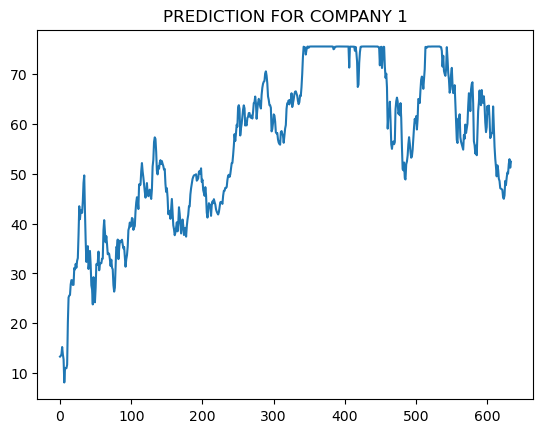

In [175]:
plt.title("PREDICTION FOR COMPANY 1")
plt.plot(pred1)

In [131]:
# pred_1

In [132]:
pred2 = model2.predict(comp_2)

22/22 [==============================] - 1s 3ms/step


In [174]:
# plt.title("PREDICTION FOR COMPANY 2")
# plt.plot(pred2)

In [133]:
# pred2

In [134]:
pred3 = model3.predict(comp_3)

20/20 [==============================] - 1s 3ms/step


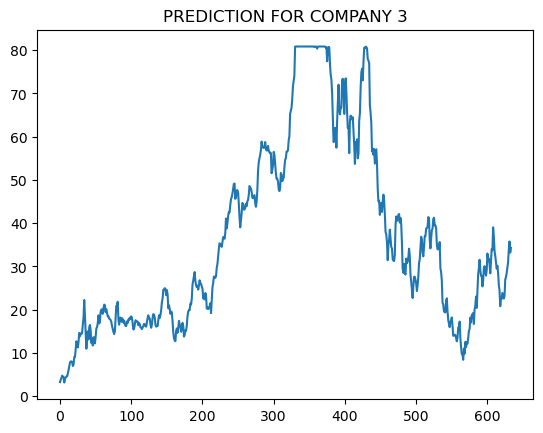

In [172]:
plt.title("PREDICTION FOR COMPANY 3")
plt.plot(pred3)

In [135]:
# pred3

In [136]:
pred4 = model4.predict(comp_4)

20/20 [==============================] - 1s 3ms/step


In [137]:
# pred4

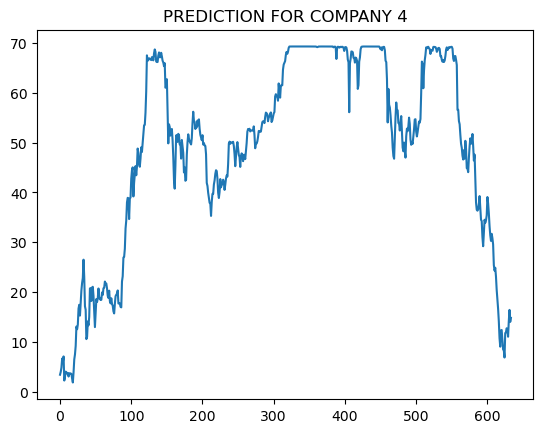

In [171]:
plt.title("PREDICTION FOR COMPANY 4")
plt.plot(pred4)

In [139]:
pred1.shape

(634, 1)

In [140]:
pred2.shape

(677, 1)

In [141]:
pred3.shape

(634, 1)

In [142]:
pred4.shape

(634, 1)

In [143]:
s1.drop(["Date","Open","High","Low","Adj Close","Volume"],axis=1,inplace=True)
s2.drop(["Date","Open","High","Low","Adj Close","Volume"],axis=1,inplace=True)
s3.drop(["Date","Open","High","Low","Adj Close","Volume"],axis=1,inplace=True)
s4.drop(["Date","Open","High","Low","Adj Close","Volume"],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [144]:
s1.head()

,Company,ID
1266,1.0,1266
1267,1.0,1267
1268,1.0,1268
1269,1.0,1269
1270,1.0,1270


In [145]:
pred1

array([[13.310904 ],
       [13.456859 ],
       [13.747184 ],
       [15.229398 ],
       [13.731893 ],
       [12.780221 ],
       [ 8.121193 ],
       [10.890605 ],
       [10.9796915],
       [10.979017 ],
       [11.67313  ],
       [20.100262 ],
       [25.180677 ],
       [25.561646 ],
       [25.662123 ],
       [27.799532 ],
       [28.65748  ],
       [28.595026 ],
       [27.681114 ],
       [27.714636 ],
       [31.08714  ],
       [30.78617  ],
       [31.903933 ],
       [31.145132 ],
       [32.518684 ],
       [33.077034 ],
       [37.727604 ],
       [43.472286 ],
       [40.875366 ],
       [42.481594 ],
       [42.72     ],
       [42.151756 ],
       [44.496243 ],
       [48.157425 ],
       [49.651974 ],
       [42.451134 ],
       [36.633026 ],
       [32.30089  ],
       [34.613758 ],
       [35.462265 ],
       [30.888329 ],
       [32.046574 ],
       [34.504433 ],
       [31.79196  ],
       [27.603476 ],
       [26.79348  ],
       [23.776905 ],
       [29.24

In [146]:
pred1.shape

(634, 1)

In [147]:
pred_1 = np.delete(pred1,633,axis=0)
pred_3 = np.delete(pred3,633,axis=0)
pred_4 = np.delete(pred4,633,axis=0)

In [148]:
# pred_1

In [149]:
pred2.shape

(677, 1)

In [152]:
pred_2 = np.delete(pred2,l,axis=0)

In [153]:
pred_2.shape

(633, 1)

In [154]:
pred_4

array([[ 3.3887084],
       [ 3.9623263],
       [ 4.829685 ],
       [ 6.6277943],
       [ 5.8890233],
       [ 7.060845 ],
       [ 2.223098 ],
       [ 3.027648 ],
       [ 4.0061636],
       [ 3.8778508],
       [ 3.5883644],
       [ 3.720802 ],
       [ 3.0254302],
       [ 3.6771774],
       [ 3.5697117],
       [ 3.6433756],
       [ 3.5335174],
       [ 2.6051798],
       [ 1.8318925],
       [ 3.8506243],
       [ 6.4568844],
       [ 7.463953 ],
       [ 9.180786 ],
       [13.05339  ],
       [12.519212 ],
       [13.469421 ],
       [16.682098 ],
       [17.428928 ],
       [15.261367 ],
       [17.609287 ],
       [20.29213  ],
       [21.81366  ],
       [22.805695 ],
       [26.486683 ],
       [23.017437 ],
       [17.134789 ],
       [16.433926 ],
       [10.542765 ],
       [11.001534 ],
       [14.08619  ],
       [13.310014 ],
       [15.012795 ],
       [20.707298 ],
       [20.787273 ],
       [18.195644 ],
       [20.902477 ],
       [21.045593 ],
       [19.21

In [155]:
s1["Close"] = np.array(pred_1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
s2["Close"] = np.array(pred_2)
s3["Close"] = np.array(pred_3)
s4["Close"] = np.array(pred_4)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [157]:
s1

,Company,ID,Close
1266,1.0,1266,13.310904
1267,1.0,1267,13.456859
1268,1.0,1268,13.747184
1269,1.0,1269,15.229398
1270,1.0,1270,13.731893
...,...,...,...
1894,1.0,1894,50.240166
1895,1.0,1895,50.016262
1896,1.0,1896,51.941807
1897,1.0,1897,52.905884


In [158]:
test_df[1899:]

,Date,Open,High,Low,Adj Close,Volume,Company,ID
1899,2020-07-17,150.56,151.39,147.48,148.13,95226000.0,2.0,1899
1900,2020-07-20,149.94,160.18,149.87,159.74,151964000.0,2.0,1900
1901,2020-07-21,161.54,162.13,155.22,156.98,122426000.0,2.0,1901
1902,2020-07-22,156.17,157.51,153.29,155.00,82084000.0,2.0,1902
1903,2020-07-23,154.96,154.99,148.58,149.30,113138000.0,2.0,1903
...,...,...,...,...,...,...,...,...
2527,2023-01-13,94.19,98.49,94.13,98.35,85413600.0,2.0,2527
2528,2023-01-17,98.54,98.82,95.81,96.13,72755000.0,2.0,2528
2529,2023-01-18,97.38,99.31,95.42,95.53,79570400.0,2.0,2529
2530,2023-01-19,94.74,95.38,92.98,93.78,69002700.0,2.0,2530


In [159]:
result = pd.concat([s4,s3,s1,s2])

In [160]:
result.shape,test_df.shape

((2532, 3), (2532, 8))

In [161]:
result_f  = result.drop("Company",axis=1)

In [162]:
result_f.head()

,ID,Close
0,0,3.388708
1,1,3.962326
2,2,4.829685
3,3,6.627794
4,4,5.889023


><div style="border: 2px solid blue; border-radius: 5px; color:red;">
    <h3><b>SAVING CSV FILE</b></h3>
</div>

In [163]:
result_f.to_csv("Submission_um.csv",index=False)

In [164]:
close1 = df1t.Close

In [165]:
close2 = df2t.Close
close3 = df3t.Close
close4 = df4t.Close

In [166]:
pre1 = pred_1.reshape(633,)

In [167]:
close2

0         5.49
1         5.38
2         5.45
3         5.54
4         5.67
         ...  
2525    155.17
2526    154.22
2527    150.41
2528    150.04
2529    148.01
Name: Close, Length: 2530, dtype: float64

In [168]:
pred_4

array([[ 3.3887084],
       [ 3.9623263],
       [ 4.829685 ],
       [ 6.6277943],
       [ 5.8890233],
       [ 7.060845 ],
       [ 2.223098 ],
       [ 3.027648 ],
       [ 4.0061636],
       [ 3.8778508],
       [ 3.5883644],
       [ 3.720802 ],
       [ 3.0254302],
       [ 3.6771774],
       [ 3.5697117],
       [ 3.6433756],
       [ 3.5335174],
       [ 2.6051798],
       [ 1.8318925],
       [ 3.8506243],
       [ 6.4568844],
       [ 7.463953 ],
       [ 9.180786 ],
       [13.05339  ],
       [12.519212 ],
       [13.469421 ],
       [16.682098 ],
       [17.428928 ],
       [15.261367 ],
       [17.609287 ],
       [20.29213  ],
       [21.81366  ],
       [22.805695 ],
       [26.486683 ],
       [23.017437 ],
       [17.134789 ],
       [16.433926 ],
       [10.542765 ],
       [11.001534 ],
       [14.08619  ],
       [13.310014 ],
       [15.012795 ],
       [20.707298 ],
       [20.787273 ],
       [18.195644 ],
       [20.902477 ],
       [21.045593 ],
       [19.21

In [169]:
pl = np.concatenate((close1,pre1),axis=0)

><div style="border: 2px solid blue; border-radius: 5px; color:red;">
    <h3><b>LAST PREDICTION PLOT ALONG WITH GIVEN DATA</b></h3>
</div>

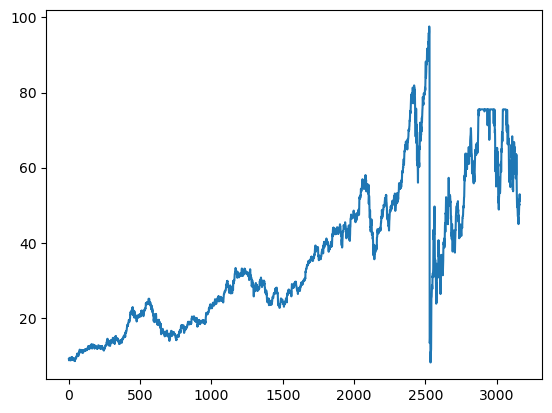

In [170]:
plt.plot(pl)